# Program Sistem Klasifikasi Ikan Menggunakan Convolutional Neural Network (CNN) Menggunakan Bahasa Pemrograman Python Jupyter Notebook


Pertama, import library yang dibutuhkan.

In [377]:
# Library yang dibutuhkan

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
import glob
import time
import cv2
#untuk resize image
from PIL import Image
import os

%matplotlib inline

In [378]:
#funngsi untuk auto resize image
new_width = 100;
new_height = 70;

def auto_resize_images(input_folder, output_folder, new_width, new_height):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        if filename.endswith(".jpg"):
            img_path = os.path.join(input_folder, filename)
            output_path = os.path.join(output_folder, filename)

            img = Image.open(img_path)

            resized_img = img.resize((new_width, new_height))
            resized_img.save(output_path)

            print(f"Resized {filename} successfully!")

In [379]:
#untuk auto resize gambar dataset
#jalankan hanya sekali run pada saat memasukkan dataset baru, jika sudah maka tidak usah dijalankan lagi

#array
tujuan = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,];

#alamat folder image
# tujuan (data latih)
tujuan[0] = "dataset-ikan/data-training/arwana/"
tujuan[1] = "dataset-ikan/data-training/discus/"
tujuan[2] = "dataset-ikan/data-training/gurami/"
tujuan[3] = "dataset-ikan/data-training/lemon/"
tujuan[4] = "dataset-ikan/data-training/badut/"
tujuan[5] = "dataset-ikan/data-training/hiu/"
tujuan[6] = "dataset-ikan/data-training/pari/"
tujuan[7] = "dataset-ikan/data-training/paus/"

# tujuan (data uji)
tujuan[8] = "dataset-ikan/data-uji/arwana/"
tujuan[9] = "dataset-ikan/data-uji/discus/"
tujuan[10] = "dataset-ikan/data-uji/gurami/"
tujuan[11] = "dataset-ikan/data-uji/lemon/"
tujuan[12] = "dataset-ikan/data-uji/badut/"
tujuan[13] = "dataset-ikan/data-uji/hiu/"
tujuan[14] = "dataset-ikan/data-uji/pari/"
tujuan[15] = "dataset-ikan/data-uji/paus/"

# jalankan sekali jika ada dataset baru
# for i in range(16):
#     auto_resize_images(tujuan[i], tujuan[i], new_width, new_height)

In [380]:
# Panggil gambar Dataset
# Urutan Data Ikan
##Ikan Air Tawar##
# arwana
# discus
# gurami
# lemon
##Ikan Air Laut##
# badut
# hiu
# pari
# paus

# 1 ikan air tawar (data latih)
dir_arwana = "dataset-ikan/data-training/arwana/*.jpg"
dir_discus = "dataset-ikan/data-training/discus/*.jpg"
dir_gurami = "dataset-ikan/data-training/gurami/*.jpg"
dir_lemon = "dataset-ikan/data-training/lemon/*.jpg"

# 2 ikan air laut (data latih)
dir_badut = "dataset-ikan/data-training/badut/*.jpg"
dir_hiu = "dataset-ikan/data-training/hiu/*.jpg"
dir_pari = "dataset-ikan/data-training/pari/*.jpg"
dir_paus = "dataset-ikan/data-training/paus/*.jpg"

#1
files = glob.glob(dir_arwana)
arwana = []
for f1 in files:
    img = cv2.imread(f1)
    arwana.append(img)

files = glob.glob(dir_discus) 
discus = []
for f1 in files: 
    img = cv2.imread(f1) 
    discus.append(img) 

files = glob.glob(dir_gurami) 
gurami = []
for f1 in files: 
    img = cv2.imread(f1) 
    gurami.append(img) 

files = glob.glob(dir_lemon) 
lemon = []
for f1 in files: 
    img = cv2.imread(f1) 
    lemon.append(img) 

#2
files = glob.glob(dir_badut)
badut = []
for f1 in files: 
    img = cv2.imread(f1) 
    badut.append(img) 

files = glob.glob(dir_hiu)
hiu = []
for f1 in files: 
    img = cv2.imread(f1) 
    hiu.append(img) 

files = glob.glob(dir_pari)
pari = []
for f1 in files: 
    img = cv2.imread(f1) 
    pari.append(img) 

files = glob.glob(dir_paus)
paus = []
for f1 in files: 
    img = cv2.imread(f1) 
    paus.append(img)
    
# 3 ikan air tawar (data uji)
dir_arwana_uji = "dataset-ikan/data-uji/arwana/*.jpg"
dir_discus_uji = "dataset-ikan/data-uji/discus/*.jpg"
dir_gurami_uji = "dataset-ikan/data-uji/gurami/*.jpg"
dir_lemon_uji = "dataset-ikan/data-uji/lemon/*.jpg"

# 4 ikan air laut (data uji)
dir_badut_uji = "dataset-ikan/data-uji/badut/*.jpg"
dir_hiu_uji = "dataset-ikan/data-uji/hiu/*.jpg"
dir_pari_uji = "dataset-ikan/data-uji/pari/*.jpg"
dir_paus_uji = "dataset-ikan/data-uji/paus/*.jpg"

#3
files = glob.glob(dir_arwana_uji) 
arwana_uji = []
for f1 in files: 
    img = cv2.imread(f1) 
    arwana_uji.append(img) 

files = glob.glob(dir_discus_uji) 
discus_uji = []
for f1 in files: 
    img = cv2.imread(f1) 
    discus_uji.append(img) 

files = glob.glob(dir_gurami_uji) 
gurami_uji = []
for f1 in files: 
    img = cv2.imread(f1) 
    gurami_uji.append(img) 

files = glob.glob(dir_lemon_uji) 
lemon_uji = []
for f1 in files: 
    img = cv2.imread(f1) 
    lemon_uji.append(img) 

#4
files = glob.glob(dir_badut_uji)
badut_uji = []
for f1 in files: 
    img = cv2.imread(f1) 
    badut_uji.append(img) 

files = glob.glob(dir_hiu_uji)
hiu_uji = []
for f1 in files: 
    img = cv2.imread(f1) 
    hiu_uji.append(img) 

files = glob.glob(dir_pari_uji)
pari_uji = []
for f1 in files: 
    img = cv2.imread(f1) 
    pari_uji.append(img) 

files = glob.glob(dir_paus_uji)
paus_uji = []
for f1 in files: 
    img = cv2.imread(f1) 
    paus_uji.append(img)

In [381]:
# Cek ukuran image Data latih
[np.shape(arwana), np.shape(discus), np.shape(gurami), np.shape(lemon), 
 np.shape(badut), np.shape(hiu), np.shape(pari), np.shape(paus)]

[(8, 70, 100, 3),
 (8, 70, 100, 3),
 (8, 70, 100, 3),
 (8, 70, 100, 3),
 (8, 70, 100, 3),
 (8, 70, 100, 3),
 (8, 70, 100, 3),
 (8, 70, 100, 3)]

In [382]:
# Cek ukuran image Data uji
[np.shape(arwana_uji), np.shape(discus_uji), np.shape(gurami_uji), np.shape(lemon_uji), 
 np.shape(badut_uji), np.shape(hiu_uji), np.shape(pari_uji), np.shape(paus_uji)]

[(4, 70, 100, 3),
 (4, 70, 100, 3),
 (4, 70, 100, 3),
 (4, 70, 100, 3),
 (4, 70, 100, 3),
 (4, 70, 100, 3),
 (4, 70, 100, 3),
 (4, 70, 100, 3)]

In [383]:
# Data Latih semua jenis ikan digabung
X = np.vstack((arwana, discus, gurami, lemon, badut, hiu, pari, paus)).astype(np.float32)

In [384]:
# Cek ukuran Data Latih setelah digabung
X.shape

(64, 70, 100, 3)

In [385]:
# Tampilkan data latih sebelum dinormalisasi
print(X)

[[[[ 13.  13.  13.]
   [ 12.  12.  12.]
   [ 12.  12.  12.]
   ...
   [ 14.  14.  14.]
   [ 14.  14.  14.]
   [ 14.  14.  14.]]

  [[ 13.  13.  13.]
   [ 13.  13.  13.]
   [ 13.  13.  13.]
   ...
   [ 14.  14.  14.]
   [ 14.  14.  14.]
   [ 14.  14.  14.]]

  [[ 14.  14.  14.]
   [ 14.  14.  14.]
   [ 13.  13.  13.]
   ...
   [ 14.  14.  14.]
   [ 14.  14.  14.]
   [ 14.  14.  14.]]

  ...

  [[ 13.  13.  13.]
   [ 13.  13.  13.]
   [ 14.  14.  14.]
   ...
   [ 14.  14.  14.]
   [ 14.  14.  14.]
   [ 14.  14.  14.]]

  [[ 13.  13.  13.]
   [ 13.  13.  13.]
   [ 14.  14.  14.]
   ...
   [ 14.  14.  14.]
   [ 14.  14.  14.]
   [ 14.  14.  14.]]

  [[ 13.  13.  13.]
   [ 13.  13.  13.]
   [ 13.  13.  13.]
   ...
   [ 14.  14.  14.]
   [ 14.  14.  14.]
   [ 14.  14.  14.]]]


 [[[235.   4.  30.]
   [235.   4.  30.]
   [236.   4.  30.]
   ...
   [220.   6.  29.]
   [220.   6.  29.]
   [219.   5.  28.]]

  [[235.   4.  30.]
   [235.   4.  30.]
   [236.   4.  30.]
   ...
   [220.   6.  29.]
 

In [386]:
# Data Latih semua jenis ikan Dinormalisasi
X = X / 255.0

In [387]:
# Tampilkan setelah dinormalisasi
print(X)

[[[[0.05098039 0.05098039 0.05098039]
   [0.04705882 0.04705882 0.04705882]
   [0.04705882 0.04705882 0.04705882]
   ...
   [0.05490196 0.05490196 0.05490196]
   [0.05490196 0.05490196 0.05490196]
   [0.05490196 0.05490196 0.05490196]]

  [[0.05098039 0.05098039 0.05098039]
   [0.05098039 0.05098039 0.05098039]
   [0.05098039 0.05098039 0.05098039]
   ...
   [0.05490196 0.05490196 0.05490196]
   [0.05490196 0.05490196 0.05490196]
   [0.05490196 0.05490196 0.05490196]]

  [[0.05490196 0.05490196 0.05490196]
   [0.05490196 0.05490196 0.05490196]
   [0.05098039 0.05098039 0.05098039]
   ...
   [0.05490196 0.05490196 0.05490196]
   [0.05490196 0.05490196 0.05490196]
   [0.05490196 0.05490196 0.05490196]]

  ...

  [[0.05098039 0.05098039 0.05098039]
   [0.05098039 0.05098039 0.05098039]
   [0.05490196 0.05490196 0.05490196]
   ...
   [0.05490196 0.05490196 0.05490196]
   [0.05490196 0.05490196 0.05490196]
   [0.05490196 0.05490196 0.05490196]]

  [[0.05098039 0.05098039 0.05098039]
   [0.0

In [388]:
# Data Uji semua jenis ikan digabung
X_uji = np.vstack((arwana_uji, discus_uji, gurami_uji, lemon_uji, 
badut_uji, hiu_uji, pari_uji, paus_uji)).astype(np.float32)

In [389]:
# Cek ukuran Data Uji
X_uji.shape

(32, 70, 100, 3)

In [390]:
# Data Uji sebelum dinormalisasi
print(X_uji)

[[[[ 27.  20.  23.]
   [ 26.  19.  22.]
   [ 26.  19.  22.]
   ...
   [ 28.  14.  18.]
   [ 28.  14.  18.]
   [ 28.  14.  18.]]

  [[ 26.  19.  22.]
   [ 25.  18.  21.]
   [ 24.  17.  20.]
   ...
   [ 30.  16.  20.]
   [ 30.  16.  20.]
   [ 30.  16.  20.]]

  [[ 25.  18.  21.]
   [ 24.  17.  20.]
   [ 23.  16.  19.]
   ...
   [ 30.  16.  20.]
   [ 30.  16.  20.]
   [ 30.  16.  20.]]

  ...

  [[ 28.  16.  22.]
   [ 28.  16.  22.]
   [ 28.  16.  22.]
   ...
   [ 28.  13.  17.]
   [ 28.  13.  17.]
   [ 28.  13.  17.]]

  [[ 28.  16.  22.]
   [ 28.  16.  22.]
   [ 28.  16.  22.]
   ...
   [ 28.  13.  17.]
   [ 28.  13.  17.]
   [ 28.  13.  17.]]

  [[ 28.  16.  22.]
   [ 28.  16.  22.]
   [ 28.  16.  22.]
   ...
   [ 28.  13.  17.]
   [ 28.  13.  17.]
   [ 28.  13.  17.]]]


 [[[ 72.  39.  24.]
   [ 74.  41.  26.]
   [ 75.  40.  26.]
   ...
   [ 21.  15.  10.]
   [ 20.  14.   9.]
   [ 19.  13.   8.]]

  [[ 72.  39.  24.]
   [ 73.  40.  25.]
   [ 75.  40.  26.]
   ...
   [ 46.  18.  11.]
 

In [391]:
# Data Uji semua jenis ikan Dinormalisasi

X_uji = X_uji / 255.0


In [392]:
# Cek setelah dinormalisasi
print(X_uji)

[[[[0.10588235 0.07843138 0.09019608]
   [0.10196079 0.07450981 0.08627451]
   [0.10196079 0.07450981 0.08627451]
   ...
   [0.10980392 0.05490196 0.07058824]
   [0.10980392 0.05490196 0.07058824]
   [0.10980392 0.05490196 0.07058824]]

  [[0.10196079 0.07450981 0.08627451]
   [0.09803922 0.07058824 0.08235294]
   [0.09411765 0.06666667 0.07843138]
   ...
   [0.11764706 0.0627451  0.07843138]
   [0.11764706 0.0627451  0.07843138]
   [0.11764706 0.0627451  0.07843138]]

  [[0.09803922 0.07058824 0.08235294]
   [0.09411765 0.06666667 0.07843138]
   [0.09019608 0.0627451  0.07450981]
   ...
   [0.11764706 0.0627451  0.07843138]
   [0.11764706 0.0627451  0.07843138]
   [0.11764706 0.0627451  0.07843138]]

  ...

  [[0.10980392 0.0627451  0.08627451]
   [0.10980392 0.0627451  0.08627451]
   [0.10980392 0.0627451  0.08627451]
   ...
   [0.10980392 0.05098039 0.06666667]
   [0.10980392 0.05098039 0.06666667]
   [0.10980392 0.05098039 0.06666667]]

  [[0.10980392 0.0627451  0.08627451]
   [0.1

In [393]:
# Label ikan Data Latih
label_arwana = np.array([0, 0, 0, 0, 0, 0, 0, 0])
label_discus = np.array([1, 1, 1, 1, 1, 1, 1, 1])
label_gurami = np.array([2, 2, 2, 2, 2, 2, 2, 2])
label_lemon  = np.array([3, 3, 3, 3, 3, 3, 3, 3])
label_badut  = np.array([4, 4, 4, 4, 4, 4, 4, 4])
label_hiu    = np.array([5, 5, 5, 5, 5, 5, 5, 5])
label_pari   = np.array([6, 6, 6, 6, 6, 6, 6, 6])
label_paus   = np.array([7, 7, 7, 7, 7, 7, 7, 7])

In [394]:
# Cek ukuran label Data Latih
[np.shape(label_arwana), np.shape(label_discus), np.shape(label_gurami), np.shape(label_lemon), 
 np.shape(label_badut), np.shape(label_hiu), np.shape(label_pari), np.shape(label_paus)]

[(8,), (8,), (8,), (8,), (8,), (8,), (8,), (8,)]

In [395]:
# Semua Label Ikan Data Latih digabung
y = np.hstack((label_arwana, label_discus, label_gurami, label_lemon, 
               label_badut, label_hiu, label_pari, label_paus))

In [396]:
# Cek ukuran label ikan Data Latih
y.shape

(64,)

In [397]:
# Label ikan Data uji
label_arwana_uji = np.array([0, 0, 0, 0])
label_discus_uji = np.array([1, 1, 1, 1])
label_gurami_uji = np.array([2, 2, 2, 2])
label_lemon_uji  = np.array([3, 3, 3, 3])
label_badut_uji  = np.array([4, 4, 4, 4])
label_hiu_uji    = np.array([5, 5, 5, 5])
label_pari_uji   = np.array([6, 6, 6, 6])
label_paus_uji   = np.array([7, 7, 7, 7])

In [398]:
# Cek ukuran label Data uji
[np.shape(label_arwana_uji), np.shape(label_discus_uji), np.shape(label_gurami_uji), np.shape(label_lemon_uji), 
 np.shape(label_badut_uji), np.shape(label_hiu_uji), np.shape(label_pari_uji), np.shape(label_paus_uji)]

[(4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,)]

In [399]:
# Semua Label Ikan Data uji digabung
y_uji = np.hstack((label_arwana_uji, label_discus_uji, label_gurami_uji, label_lemon_uji, 
                   label_badut_uji, label_hiu_uji, label_pari_uji, label_paus_uji))

In [400]:
# Cek ukuran label ikan Data Uji
y_uji.shape

(32,)

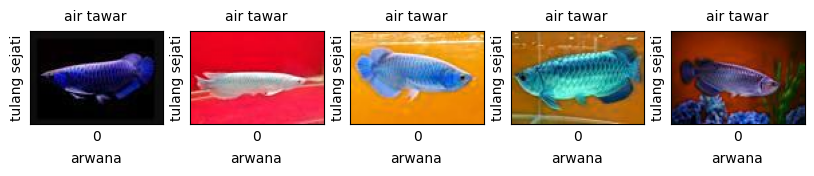

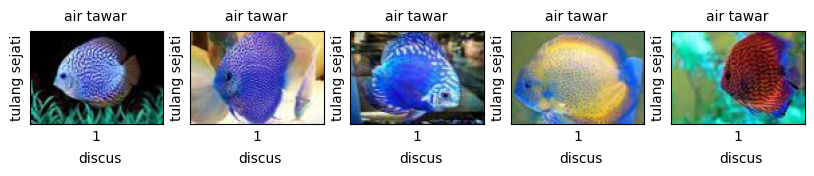

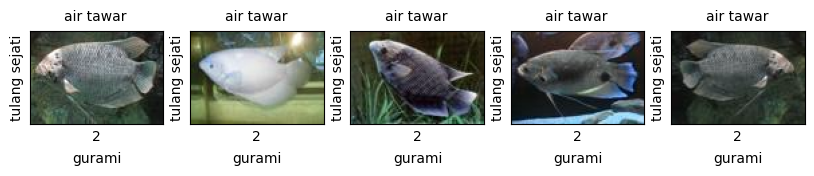

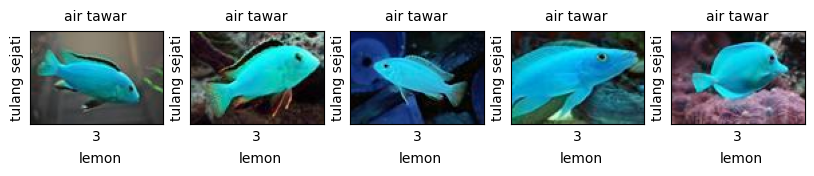

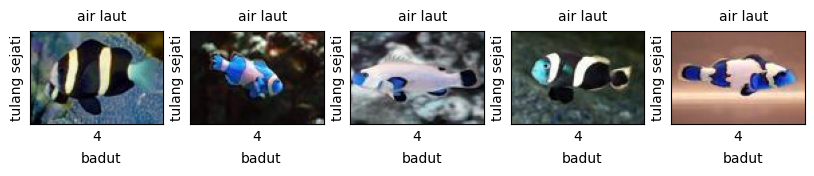

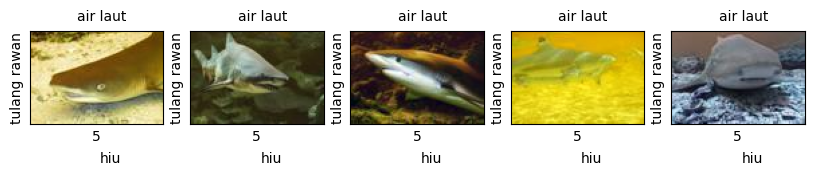

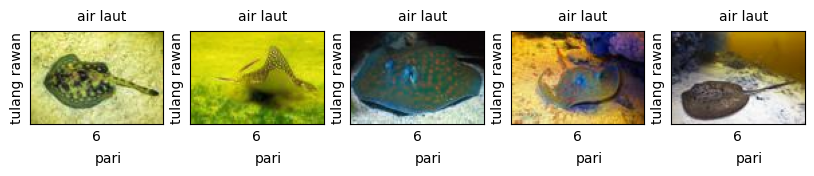

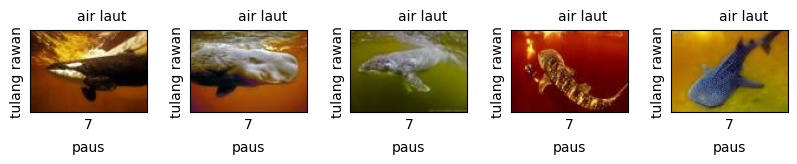

In [401]:
# Menampilkan sampel Data Latih

class_names = ['arwana', 'discus','gurami','lemon','badut','hiu','pari','paus']
kategori_air = ['air tawar', 'air laut']
kategori_bony = ['tulang rawan', 'tulang sejati']

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(arwana[i], cmap=plt.cm.binary)
    plt.xlabel(label_arwana[i])
    plt.gca().annotate(class_names[0], xy=(1, 0), xytext=(-30, -25), 
                   xycoords='axes fraction', textcoords='offset points', 
                   ha='right', va='center')
    plt.ylabel(kategori_bony[1])
    plt.gca().annotate(kategori_air[0], xy=(0, 1), xytext=(70, 10), 
                   xycoords='axes fraction', textcoords='offset points', 
                   ha='right', va='center')
plt.show()

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(discus[i], cmap=plt.cm.binary)
    plt.xlabel(label_discus[i])
    plt.gca().annotate(class_names[1], xy=(1, 0), xytext=(-30, -25), 
                   xycoords='axes fraction', textcoords='offset points', 
                   ha='right', va='center')
    plt.ylabel(kategori_bony[1])
    plt.gca().annotate(kategori_air[0], xy=(0, 1), xytext=(70, 10), 
                   xycoords='axes fraction', textcoords='offset points', 
                   ha='right', va='center')
plt.show()

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(gurami[i], cmap=plt.cm.binary)
    plt.xlabel(label_gurami[i])
    plt.gca().annotate(class_names[2], xy=(1, 0), xytext=(-30, -25), 
                   xycoords='axes fraction', textcoords='offset points', 
                   ha='right', va='center')
    plt.ylabel(kategori_bony[1])
    plt.gca().annotate(kategori_air[0], xy=(0, 1), xytext=(70, 10), 
                   xycoords='axes fraction', textcoords='offset points', 
                   ha='right', va='center')
plt.show()

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(lemon[i], cmap=plt.cm.binary)
    plt.xlabel(label_lemon[i])
    plt.gca().annotate(class_names[3], xy=(1, 0), xytext=(-30, -25), 
                   xycoords='axes fraction', textcoords='offset points', 
                   ha='right', va='center')
    plt.ylabel(kategori_bony[1])
    plt.gca().annotate(kategori_air[0], xy=(0, 1), xytext=(70, 10), 
                   xycoords='axes fraction', textcoords='offset points', 
                   ha='right', va='center')
plt.show()

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(badut[i], cmap=plt.cm.binary)
    plt.xlabel(label_badut[i])
    plt.gca().annotate(class_names[4], xy=(1, 0), xytext=(-30, -25), 
                   xycoords='axes fraction', textcoords='offset points', 
                   ha='right', va='center')
    plt.ylabel(kategori_bony[1])
    plt.gca().annotate(kategori_air[1], xy=(0, 1), xytext=(70, 10), 
                   xycoords='axes fraction', textcoords='offset points', 
                   ha='right', va='center')
plt.show()

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(hiu[i], cmap=plt.cm.binary)
    plt.xlabel(label_hiu[i])
    plt.gca().annotate(class_names[5], xy=(1, 0), xytext=(-30, -25), 
                   xycoords='axes fraction', textcoords='offset points', 
                   ha='right', va='center')
    plt.ylabel(kategori_bony[0])
    plt.gca().annotate(kategori_air[1], xy=(0, 1), xytext=(70, 10), 
                   xycoords='axes fraction', textcoords='offset points', 
                   ha='right', va='center')
plt.show()

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(7,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(pari[i], cmap=plt.cm.binary)
    plt.xlabel(label_pari[i])
    plt.gca().annotate(class_names[6], xy=(1, 0), xytext=(-30, -25), 
                   xycoords='axes fraction', textcoords='offset points', 
                   ha='right', va='center')
    plt.ylabel(kategori_bony[0])
    plt.gca().annotate(kategori_air[1], xy=(0, 1), xytext=(70, 10), 
                   xycoords='axes fraction', textcoords='offset points', 
                   ha='right', va='center')
plt.show()

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(8,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(paus[i], cmap=plt.cm.binary)
    plt.xlabel(label_paus[i])
    plt.gca().annotate(class_names[7], xy=(1, 0), xytext=(-30, -25), 
                   xycoords='axes fraction', textcoords='offset points', 
                   ha='right', va='center')
    plt.ylabel(kategori_bony[0])
    plt.gca().annotate(kategori_air[1], xy=(0, 1), xytext=(70, 10), 
                   xycoords='axes fraction', textcoords='offset points', 
                   ha='right', va='center')
plt.show()

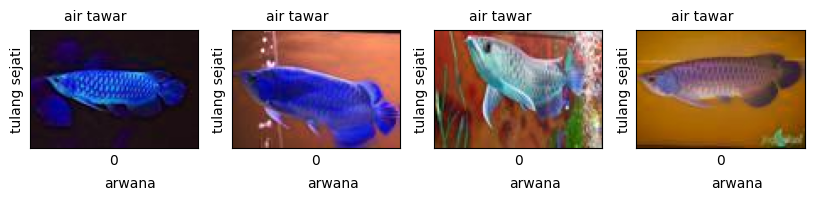

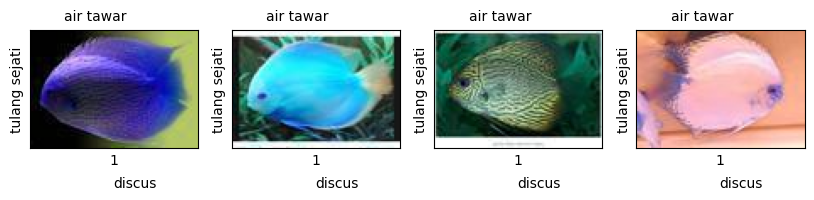

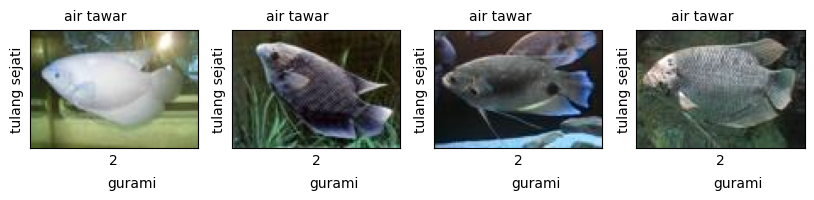

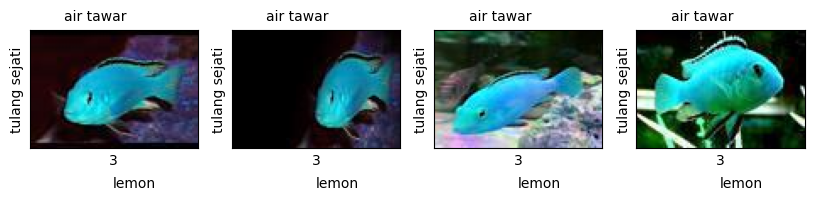

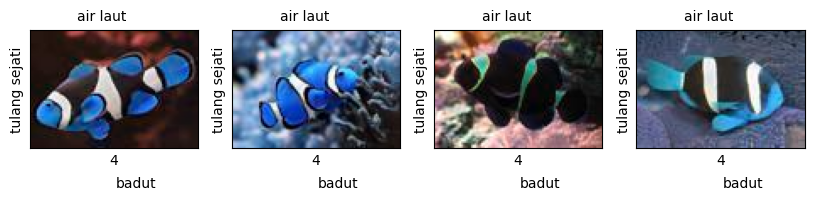

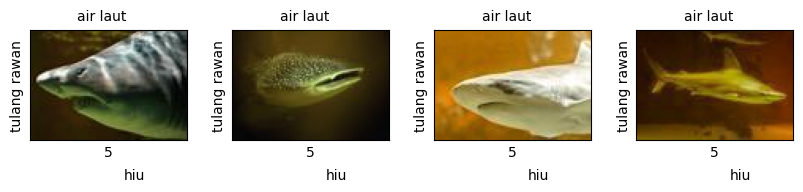

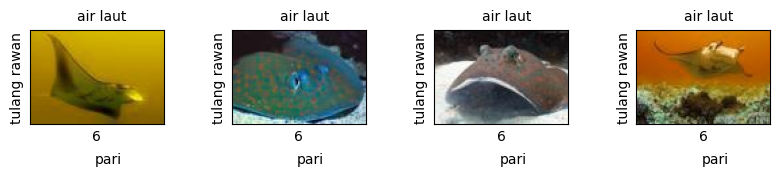

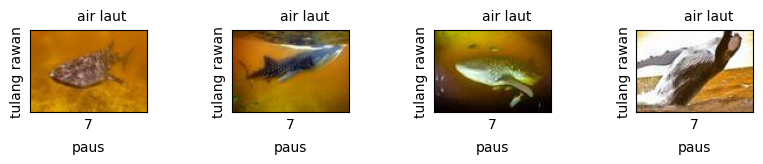

In [402]:
# Menampilkan sampel Data Latih

plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(arwana_uji[i], cmap=plt.cm.binary)
    plt.xlabel(label_arwana_uji[i])
    plt.gca().annotate(class_names[0], xy=(1, 0), xytext=(-30, -25), 
                   xycoords='axes fraction', textcoords='offset points', 
                   ha='right', va='center')
    plt.ylabel(kategori_bony[1])
    plt.gca().annotate(kategori_air[0], xy=(0, 1), xytext=(70, 10), 
                   xycoords='axes fraction', textcoords='offset points', 
                   ha='right', va='center')
plt.show()

plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(discus_uji[i], cmap=plt.cm.binary)
    plt.xlabel(label_discus_uji[i])
    plt.gca().annotate(class_names[1], xy=(1, 0), xytext=(-30, -25), 
                   xycoords='axes fraction', textcoords='offset points', 
                   ha='right', va='center')
    plt.ylabel(kategori_bony[1])
    plt.gca().annotate(kategori_air[0], xy=(0, 1), xytext=(70, 10), 
                   xycoords='axes fraction', textcoords='offset points', 
                   ha='right', va='center')
plt.show()

plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(3,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(gurami_uji[i], cmap=plt.cm.binary)
    plt.xlabel(label_gurami_uji[i])
    plt.gca().annotate(class_names[2], xy=(1, 0), xytext=(-30, -25), 
                   xycoords='axes fraction', textcoords='offset points', 
                   ha='right', va='center')
    plt.ylabel(kategori_bony[1])
    plt.gca().annotate(kategori_air[0], xy=(0, 1), xytext=(70, 10), 
                   xycoords='axes fraction', textcoords='offset points', 
                   ha='right', va='center')
plt.show()

plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(lemon_uji[i], cmap=plt.cm.binary)
    plt.xlabel(label_lemon_uji[i])
    plt.gca().annotate(class_names[3], xy=(1, 0), xytext=(-30, -25), 
                   xycoords='axes fraction', textcoords='offset points', 
                   ha='right', va='center')
    plt.ylabel(kategori_bony[1])
    plt.gca().annotate(kategori_air[0], xy=(0, 1), xytext=(70, 10), 
                   xycoords='axes fraction', textcoords='offset points', 
                   ha='right', va='center')
plt.show()

plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(5,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(badut_uji[i], cmap=plt.cm.binary)
    plt.xlabel(label_badut_uji[i])
    plt.gca().annotate(class_names[4], xy=(1, 0), xytext=(-30, -25), 
                   xycoords='axes fraction', textcoords='offset points', 
                   ha='right', va='center')
    plt.ylabel(kategori_bony[1])
    plt.gca().annotate(kategori_air[1], xy=(0, 1), xytext=(70, 10), 
                   xycoords='axes fraction', textcoords='offset points', 
                   ha='right', va='center')
plt.show()

plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(6,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(hiu_uji[i], cmap=plt.cm.binary)
    plt.xlabel(label_hiu_uji[i])
    plt.gca().annotate(class_names[5], xy=(1, 0), xytext=(-30, -25), 
                   xycoords='axes fraction', textcoords='offset points', 
                   ha='right', va='center')
    plt.ylabel(kategori_bony[0])
    plt.gca().annotate(kategori_air[1], xy=(0, 1), xytext=(70, 10), 
                   xycoords='axes fraction', textcoords='offset points', 
                   ha='right', va='center')
plt.show()

plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(7,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(pari_uji[i], cmap=plt.cm.binary)
    plt.xlabel(label_pari_uji[i])
    plt.gca().annotate(class_names[6], xy=(1, 0), xytext=(-30, -25), 
                   xycoords='axes fraction', textcoords='offset points', 
                   ha='right', va='center')
    plt.ylabel(kategori_bony[0])
    plt.gca().annotate(kategori_air[1], xy=(0, 1), xytext=(70, 10), 
                   xycoords='axes fraction', textcoords='offset points', 
                   ha='right', va='center')
plt.show()

plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(8,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(paus_uji[i], cmap=plt.cm.binary)
    plt.xlabel(label_paus_uji[i])
    plt.gca().annotate(class_names[7], xy=(1, 0), xytext=(-30, -25), 
                   xycoords='axes fraction', textcoords='offset points', 
                   ha='right', va='center')
    plt.ylabel(kategori_bony[0])
    plt.gca().annotate(kategori_air[1], xy=(0, 1), xytext=(70, 10), 
                   xycoords='axes fraction', textcoords='offset points', 
                   ha='right', va='center')
plt.show()

Buat basis konvolusional
10 baris kode di bawah ini mendefinisikan dasar convolutional menggunakan pola umum: setumpuk Conv2D dan MaxPooling2D lapisan.

Sebagai masukan, CNN mengambil bentuk tensor (tinggi_gambar, lebar_gambar, saluran_warna), mengabaikan ukuran tumpukan. Color_channels merujuk ke (R, G, B). CNN untuk memproses masukan dalam bentuk (70, 100, 3), sesuai Data Latih yang digunakan. Dapat dilakukan dengan meneruskan argumen input_shape ke lapisan pertama kita.

In [403]:
model = models.Sequential()
model.add(layers.Conv2D(100, (3, 3), activation='relu', padding="same", input_shape=(70, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(200, (3, 3), activation='relu', padding="same"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(200, (3, 3), activation='relu', padding="same"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(200, (3, 3), activation='relu', padding="same"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(200, (3, 3), activation='relu', padding="same"))

Mari kita tampilkan arsitektur model kita sejauh ini.

In [404]:
# Menampilkan arsitektur model CNN
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 70, 100, 100)      2800      
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 35, 50, 100)      0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 35, 50, 200)       180200    
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 17, 25, 200)      0         
 g2D)                                                            
                                                                 
 conv2d_57 (Conv2D)          (None, 17, 25, 200)       360200    
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 8, 12, 200)     

Di atas, dapat dilihat bahwa output dari setiap lapisan Conv2D dan MaxPooling2D adalah bentuk tensor 3D (tinggi, lebar, saluran). Dimensi lebar dan tinggi cenderung menyusut saat Anda masuk lebih dalam di jaringan. Biasanya, saat lebar dan tinggi menyusut, Anda dapat (secara komputasi) untuk menambahkan lebih banyak saluran keluaran di setiap lapisan Konv2D.

Tambahkan lapisan padat di atas untuk melengkapi model kita. Dapat dimasukkan tensor keluaran terakhir dari basis konvolusional (berbentuk (4, 6, 200)) ke dalam satu atau lebih lapisan Padat untuk melakukan klasifikasi. Lapisan padat mengambil vektor sebagai masukan (yaitu 1D), sedangkan keluaran saat ini adalah tensor 3D. Pertama, Anda akan meratakan (atau membuka gulungan) keluaran 3D ke 1D, lalu menambahkan satu atau lebih lapisan Padat di atasnya. Sistem memiliki 8 kelas keluaran (jenis ikan), jadi digunakan lapisan Dense akhir dengan 8 keluaran.

In [405]:
model.add(layers.Flatten())
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(8))

Berikut arsitektur lengkap model kami.

In [406]:
# menampilkan arsitektur lengkap model CNN
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 70, 100, 100)      2800      
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 35, 50, 100)      0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 35, 50, 200)       180200    
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 17, 25, 200)      0         
 g2D)                                                            
                                                                 
 conv2d_57 (Conv2D)          (None, 17, 25, 200)       360200    
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 8, 12, 200)     

Seperti yang Anda lihat, keluaran (4, 6, 200) kita diratakan menjadi vektor bentuk (4800) sebelum melewati dua layer Dense.

Kumpulkan dan latih modelnya

In [407]:
# # Kumpulkan dan latih modelnya
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X, y, epochs=20, 
                    validation_data=(X_uji, y_uji))

Epoch 1/20


2/2 [==============================] - 3s 1s/step - loss: 2.2405 - accuracy: 0.1406 - val_loss: 2.0710 - val_accuracy: 0.1250
Epoch 2/20
2/2 [==============================] - 2s 951ms/step - loss: 2.0709 - accuracy: 0.2188 - val_loss: 2.0624 - val_accuracy: 0.2188
Epoch 3/20
2/2 [==============================] - 2s 956ms/step - loss: 2.0490 - accuracy: 0.2344 - val_loss: 1.9995 - val_accuracy: 0.2812
Epoch 4/20
2/2 [==============================] - 2s 1s/step - loss: 1.9396 - accuracy: 0.3594 - val_loss: 1.7873 - val_accuracy: 0.2812
Epoch 5/20
2/2 [==============================] - 2s 972ms/step - loss: 1.6750 - accuracy: 0.3281 - val_loss: 2.3045 - val_accuracy: 0.2188
Epoch 6/20
2/2 [==============================] - 2s 993ms/step - loss: 1.7494 - accuracy: 0.3906 - val_loss: 1.7109 - val_accuracy: 0.2500
Epoch 7/20
2/2 [==============================] - 2s 967ms/step - loss: 1.5415 - accuracy: 0.3125 - val_loss: 1.7254 - val_accuracy: 0.3125
Epoch 8/20
2/2 [=====================

Tampilkan dalam bentuk grafik

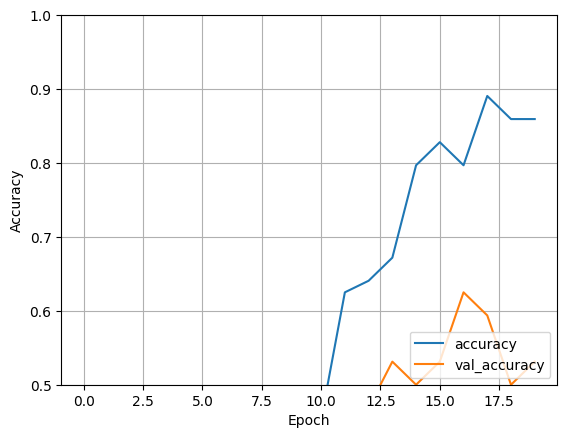

In [408]:
# Tampilkan grafik hasil pelatihan CNN dan validasi dengan Data Uji
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.grid()

In [409]:
# Evaluasi modelnya
test_loss, test_acc = model.evaluate(X_uji,  y_uji, verbose=2)
# Tampilkan hasil tes akurasi
print('Hasil akurasi pengujian =',test_acc)

1/1 - 0s - loss: 1.7627 - accuracy: 0.5312 - 192ms/epoch - 192ms/step
Hasil akurasi pengujian = 0.53125


1/1 [==============================] - 0s 206ms/step


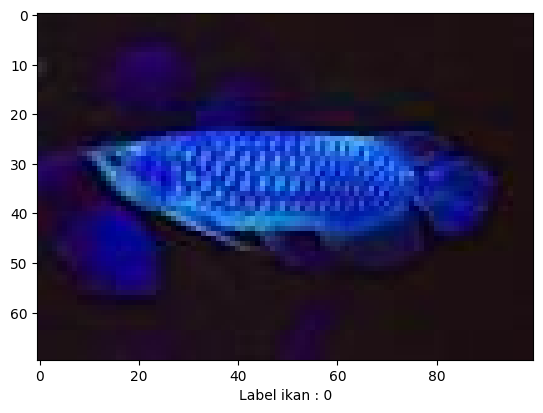

------- Hasil Prediksi Ikan -------
Prediksi Model   = 0
Nama Ikan        = arwana
Jenis Tulang     = arwana
Hidup di Air     = air tawar
Jenis Tulang     = tulang sejati


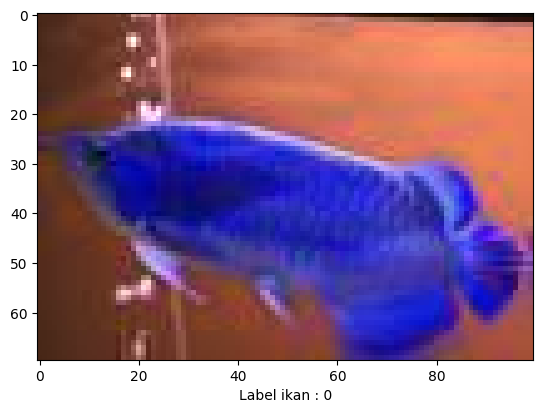

------- Hasil Prediksi Ikan -------
Prediksi Model   = 0
Nama Ikan        = arwana
Jenis Tulang     = arwana
Hidup di Air     = air tawar
Jenis Tulang     = tulang sejati


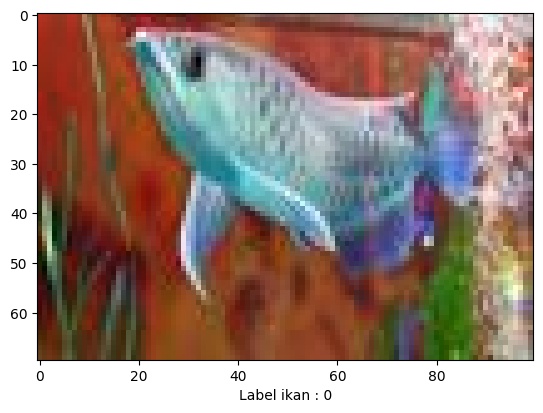

------- Hasil Prediksi Ikan -------
Prediksi Model   = 5
Nama Ikan        = hiu
Jenis Tulang     = hiu
Hidup di Air     = air laut
Jenis Tulang     = tulang rawan


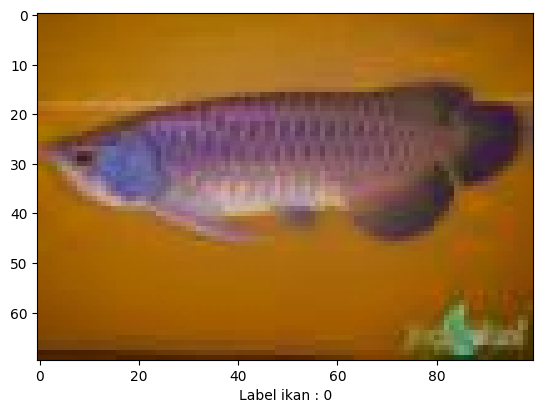

------- Hasil Prediksi Ikan -------
Prediksi Model   = 7
Nama Ikan        = paus
Jenis Tulang     = paus
Hidup di Air     = air laut
Jenis Tulang     = tulang rawan


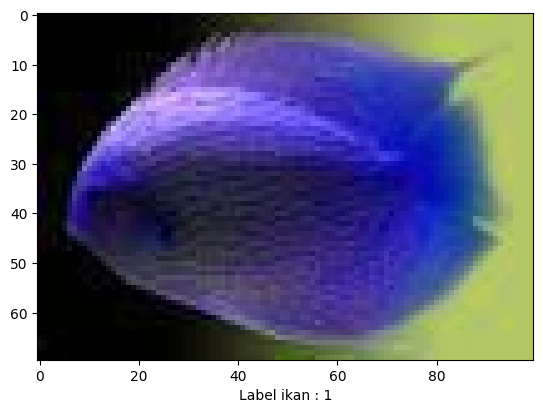

------- Hasil Prediksi Ikan -------
Prediksi Model   = 1
Nama Ikan        = discus
Jenis Tulang     = discus
Hidup di Air     = air tawar
Jenis Tulang     = tulang sejati


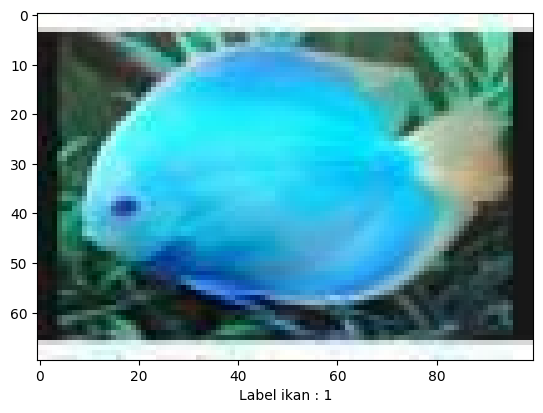

------- Hasil Prediksi Ikan -------
Prediksi Model   = 3
Nama Ikan        = lemon
Jenis Tulang     = lemon
Hidup di Air     = air tawar
Jenis Tulang     = tulang sejati


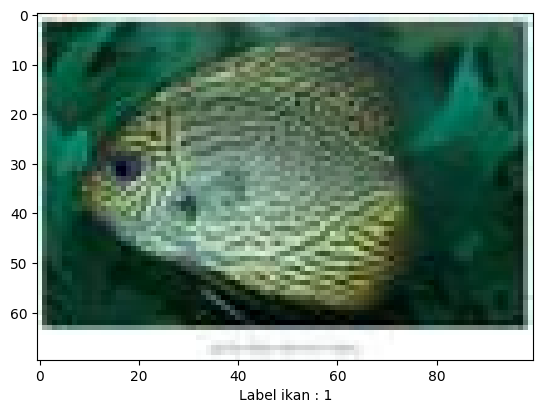

------- Hasil Prediksi Ikan -------
Prediksi Model   = 2
Nama Ikan        = gurami
Jenis Tulang     = gurami
Hidup di Air     = air tawar
Jenis Tulang     = tulang sejati


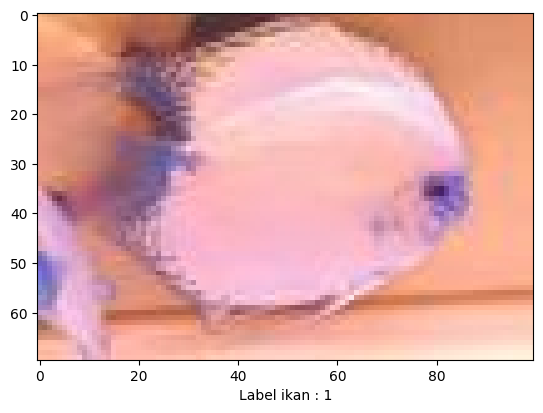

------- Hasil Prediksi Ikan -------
Prediksi Model   = 2
Nama Ikan        = gurami
Jenis Tulang     = gurami
Hidup di Air     = air tawar
Jenis Tulang     = tulang sejati


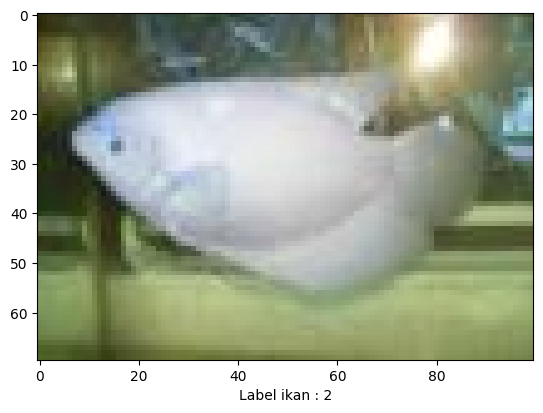

------- Hasil Prediksi Ikan -------
Prediksi Model   = 2
Nama Ikan        = gurami
Jenis Tulang     = gurami
Hidup di Air     = air tawar
Jenis Tulang     = tulang sejati


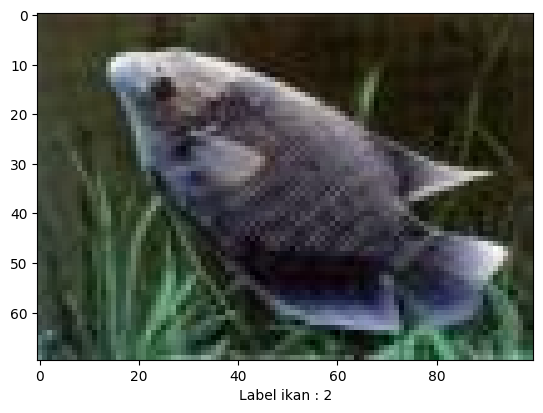

------- Hasil Prediksi Ikan -------
Prediksi Model   = 2
Nama Ikan        = gurami
Jenis Tulang     = gurami
Hidup di Air     = air tawar
Jenis Tulang     = tulang sejati


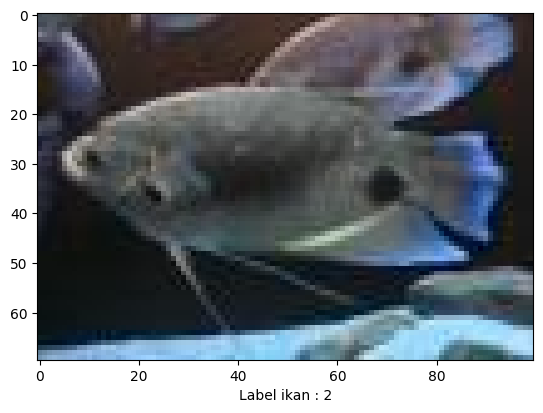

------- Hasil Prediksi Ikan -------
Prediksi Model   = 2
Nama Ikan        = gurami
Jenis Tulang     = gurami
Hidup di Air     = air tawar
Jenis Tulang     = tulang sejati


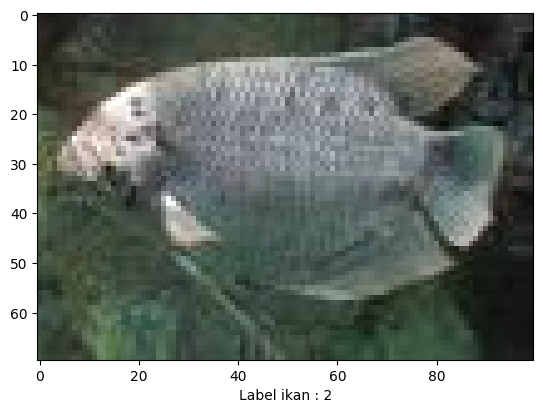

------- Hasil Prediksi Ikan -------
Prediksi Model   = 2
Nama Ikan        = gurami
Jenis Tulang     = gurami
Hidup di Air     = air tawar
Jenis Tulang     = tulang sejati


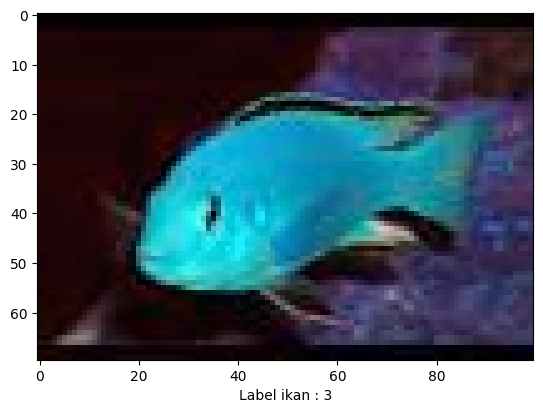

------- Hasil Prediksi Ikan -------
Prediksi Model   = 3
Nama Ikan        = lemon
Jenis Tulang     = lemon
Hidup di Air     = air tawar
Jenis Tulang     = tulang sejati


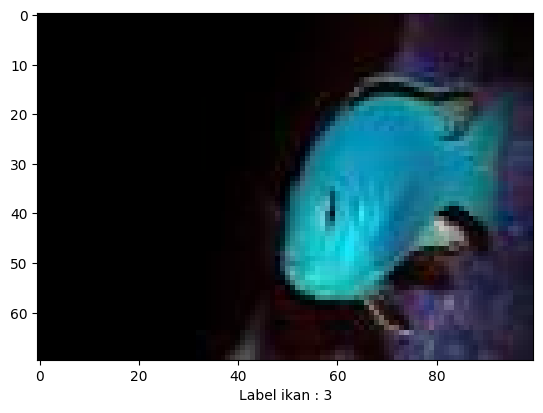

------- Hasil Prediksi Ikan -------
Prediksi Model   = 4
Nama Ikan        = badut
Jenis Tulang     = badut
Hidup di Air     = air tawar
Jenis Tulang     = tulang sejati


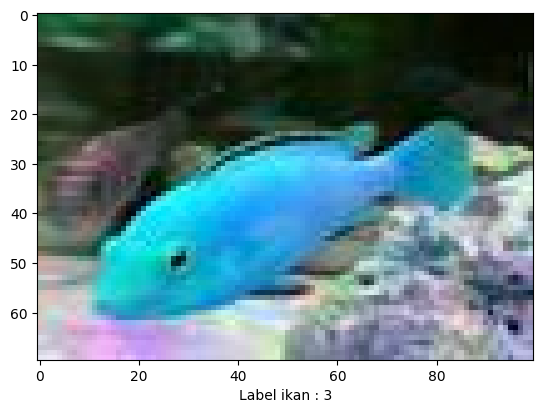

------- Hasil Prediksi Ikan -------
Prediksi Model   = 3
Nama Ikan        = lemon
Jenis Tulang     = lemon
Hidup di Air     = air tawar
Jenis Tulang     = tulang sejati


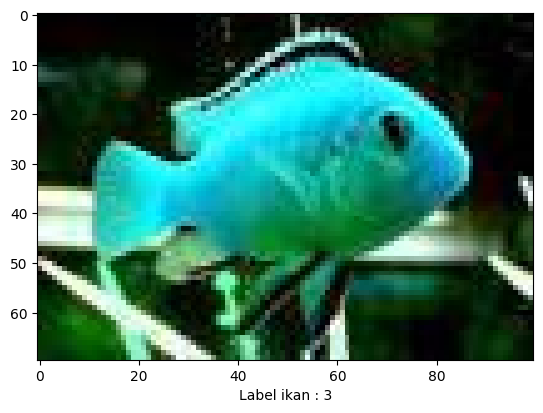

------- Hasil Prediksi Ikan -------
Prediksi Model   = 3
Nama Ikan        = lemon
Jenis Tulang     = lemon
Hidup di Air     = air tawar
Jenis Tulang     = tulang sejati


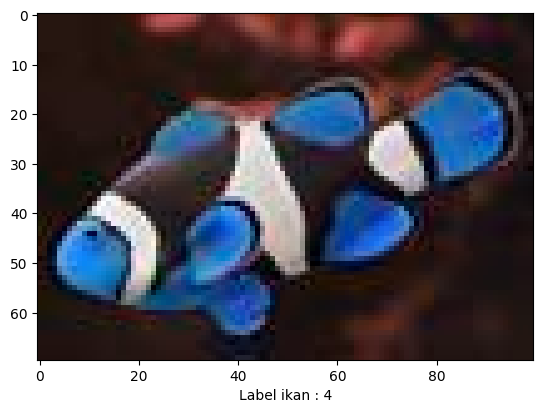

------- Hasil Prediksi Ikan -------
Prediksi Model   = 1
Nama Ikan        = discus
Jenis Tulang     = discus
Hidup di Air     = air tawar
Jenis Tulang     = tulang sejati


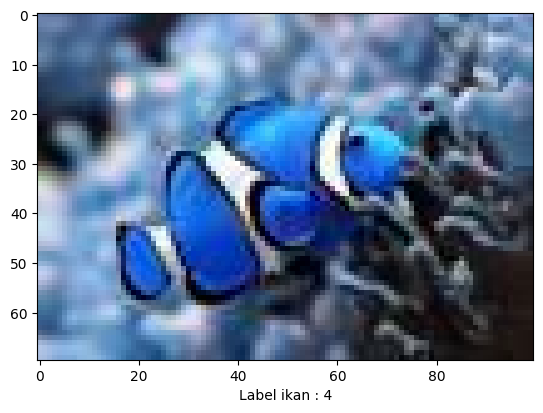

------- Hasil Prediksi Ikan -------
Prediksi Model   = 1
Nama Ikan        = discus
Jenis Tulang     = discus
Hidup di Air     = air tawar
Jenis Tulang     = tulang sejati


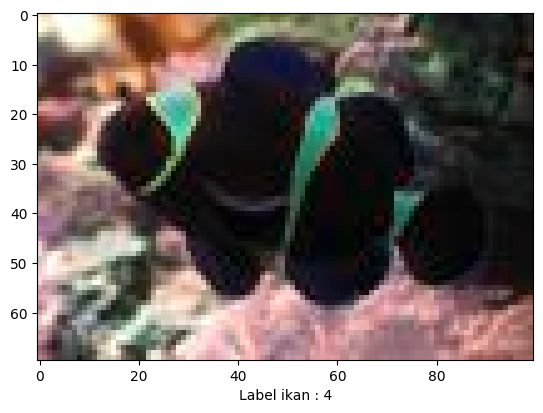

------- Hasil Prediksi Ikan -------
Prediksi Model   = 6
Nama Ikan        = pari
Jenis Tulang     = pari
Hidup di Air     = air laut
Jenis Tulang     = tulang rawan


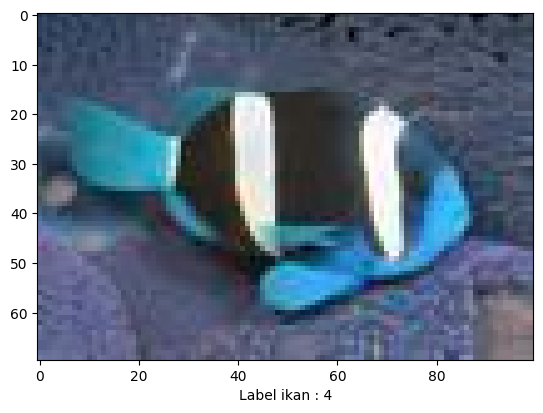

------- Hasil Prediksi Ikan -------
Prediksi Model   = 2
Nama Ikan        = gurami
Jenis Tulang     = gurami
Hidup di Air     = air tawar
Jenis Tulang     = tulang sejati


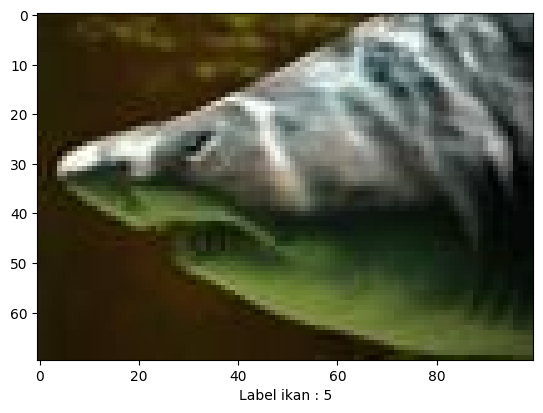

------- Hasil Prediksi Ikan -------
Prediksi Model   = 5
Nama Ikan        = hiu
Jenis Tulang     = hiu
Hidup di Air     = air laut
Jenis Tulang     = tulang rawan


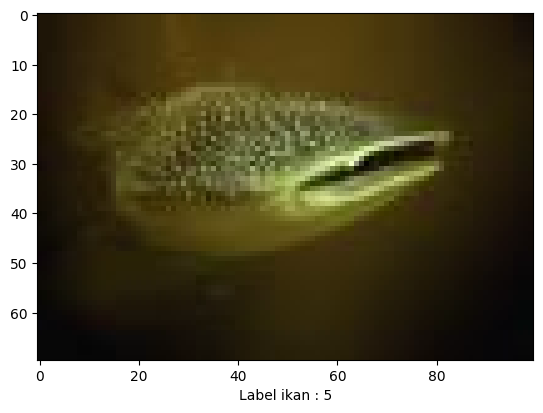

------- Hasil Prediksi Ikan -------
Prediksi Model   = 5
Nama Ikan        = hiu
Jenis Tulang     = hiu
Hidup di Air     = air laut
Jenis Tulang     = tulang rawan


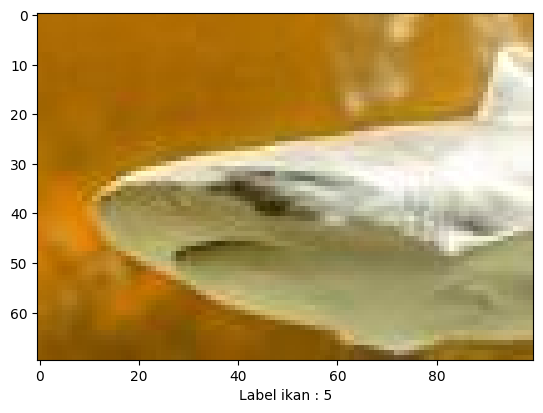

------- Hasil Prediksi Ikan -------
Prediksi Model   = 6
Nama Ikan        = pari
Jenis Tulang     = pari
Hidup di Air     = air laut
Jenis Tulang     = tulang rawan


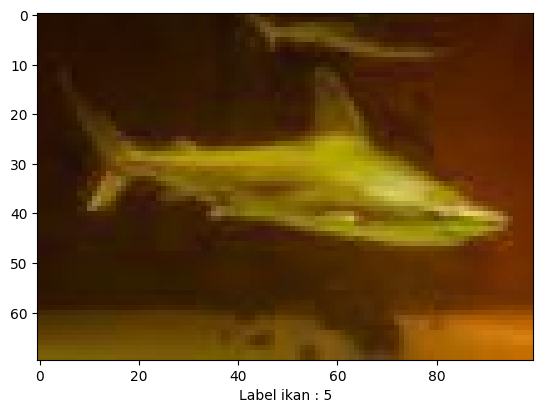

------- Hasil Prediksi Ikan -------
Prediksi Model   = 5
Nama Ikan        = hiu
Jenis Tulang     = hiu
Hidup di Air     = air laut
Jenis Tulang     = tulang rawan


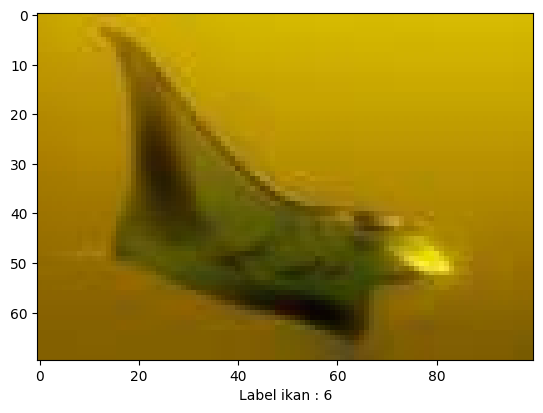

------- Hasil Prediksi Ikan -------
Prediksi Model   = 6
Nama Ikan        = pari
Jenis Tulang     = pari
Hidup di Air     = air laut
Jenis Tulang     = tulang rawan


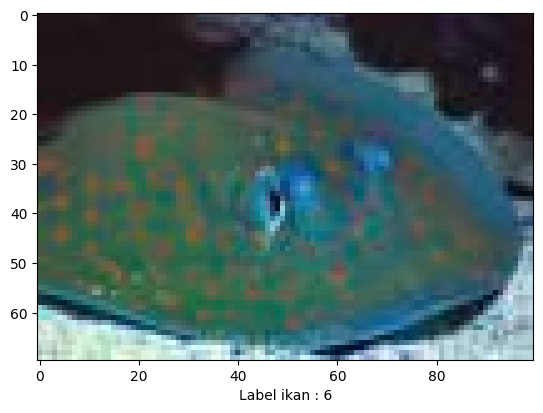

------- Hasil Prediksi Ikan -------
Prediksi Model   = 4
Nama Ikan        = badut
Jenis Tulang     = badut
Hidup di Air     = air tawar
Jenis Tulang     = tulang sejati


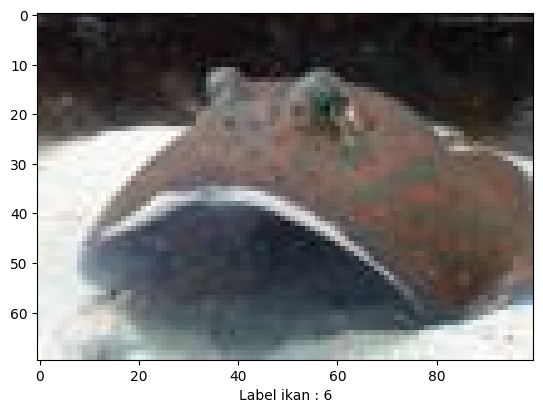

------- Hasil Prediksi Ikan -------
Prediksi Model   = 2
Nama Ikan        = gurami
Jenis Tulang     = gurami
Hidup di Air     = air tawar
Jenis Tulang     = tulang sejati


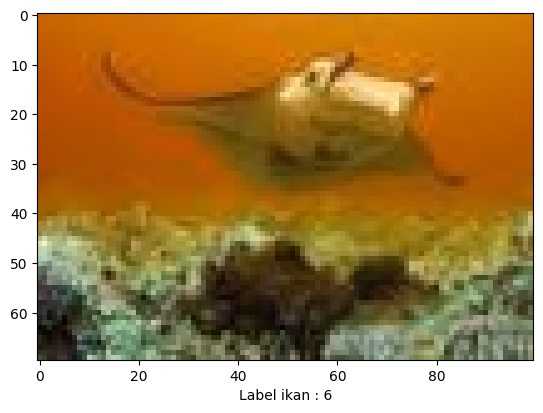

------- Hasil Prediksi Ikan -------
Prediksi Model   = 6
Nama Ikan        = pari
Jenis Tulang     = pari
Hidup di Air     = air laut
Jenis Tulang     = tulang rawan


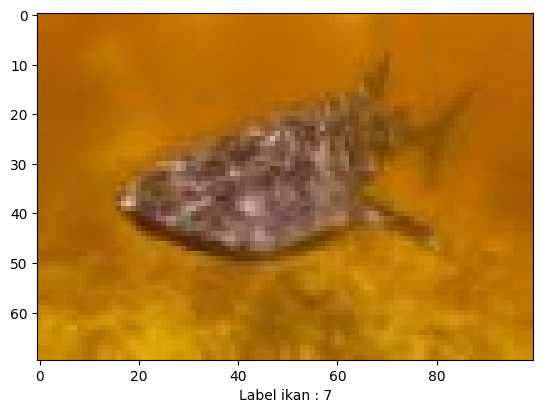

------- Hasil Prediksi Ikan -------
Prediksi Model   = 7
Nama Ikan        = paus
Jenis Tulang     = paus
Hidup di Air     = air laut
Jenis Tulang     = tulang rawan


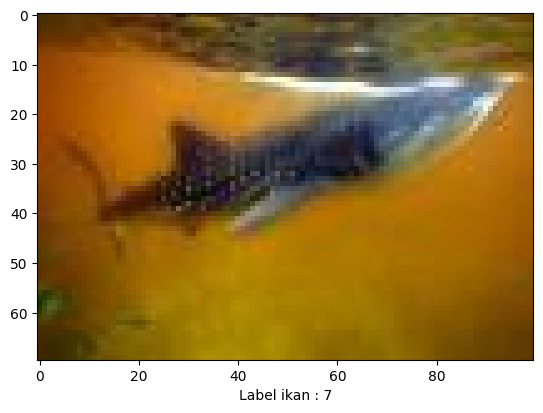

------- Hasil Prediksi Ikan -------
Prediksi Model   = 7
Nama Ikan        = paus
Jenis Tulang     = paus
Hidup di Air     = air laut
Jenis Tulang     = tulang rawan


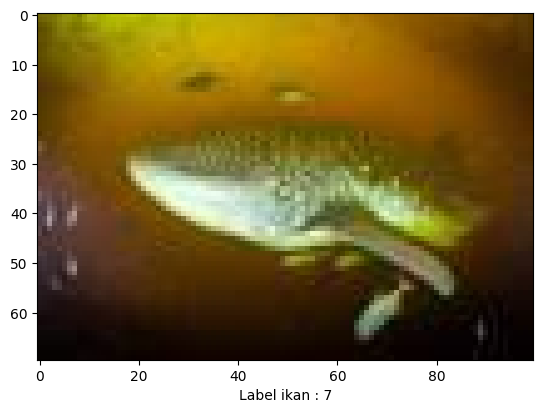

------- Hasil Prediksi Ikan -------
Prediksi Model   = 6
Nama Ikan        = pari
Jenis Tulang     = pari
Hidup di Air     = air laut
Jenis Tulang     = tulang rawan


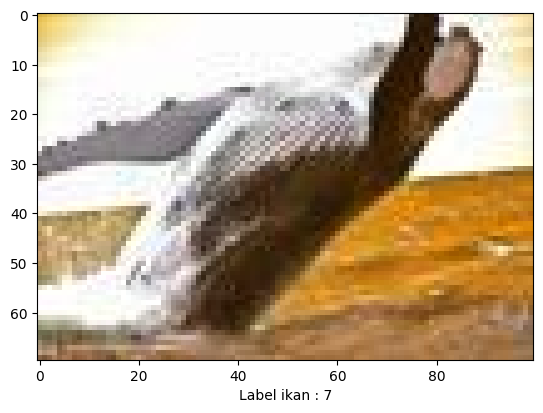

------- Hasil Prediksi Ikan -------
Prediksi Model   = 1
Nama Ikan        = discus
Jenis Tulang     = discus
Hidup di Air     = air tawar
Jenis Tulang     = tulang sejati


In [421]:
# Visualisasikan hasil prediksi pengenalan ikan.

import matplotlib.pyplot as plt

# Memprediksi 32 gambar dari Data Uji.
n_images = 32
test_images = X_uji[:n_images]
test_label = y_uji[:n_images]

predictions = model.predict(test_images)

# Menampilkan gambar dan prediksi model.
for i in range(n_images):
    plt.imshow(test_images[i])
    plt.xlabel("Label ikan : %i" % test_label[i])
    plt.show()
    print("------- Hasil Prediksi Ikan -------");
    print("Prediksi Model   = %i" % np.argmax(predictions[i]))
    print("Nama Ikan        = %s" %class_names[np.argmax(predictions[i])]);
    print("Jenis Tulang     = %s" %class_names[np.argmax(predictions[i])]);
    if np.argmax(predictions[i]) == 5 or np.argmax(predictions[i]) == 6 or np.argmax(predictions[i]) == 7:
        print("Hidup di Air     = %s" %kategori_air[1]);
        print("Jenis Tulang     = %s" %kategori_bony[0]);
    else:
        print("Hidup di Air     = %s" %kategori_air[0]);
        print("Jenis Tulang     = %s" %kategori_bony[1]);


In [ ]:
(70+90+70+90+100)/5


84.0